<a href="https://colab.research.google.com/github/Avit-hodibu/Recurrent_Neural_Network/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recurrent NN**: it is a type of sequential model to work on sequential data.

For example : if we are writting text then sequence matter. Hi, my name is Nitesh cannot be same as Nitesh Hi, my is name. We read text by text and retain the context and by adding it we gain meaning. This is an example of sequential data.

Sequential data: any text data, time series data, speech data and DNA sequence. It is where sequence matter.

NLP use RNN mostly.

**Why RNN are needed?**

if we use ANN for sequence data, we have three problems:
1. text input -> varying size
2. zero padding -> unnecessary computation
3. prediction problem
4. totally disregarding the sequence information

That is why we need RNN to solve sequence data

1. sequence data can be of any length but, ANN is fixed input size
2. sequence contain some meaning but in ANN we lose sequence order




RNN application:

- sentence completetion
- give a caption of image
- translation
- summary of text
- question and answer

# RNN Architecture

Data for RNN: data shape for each data is(timesteps, input_features)

for example:

|----------Review----------|sentiment|

movie was good -----| 1

movie was bad--------| 0

movie was not good| 0

we have three data about movie review. It is positive(1) or negative(0)

we have 5 vocab we assign 5 number representation: movie[10000], was[01000], good[00100], bad[00010] and not[00001].

If i have to represent particular review in vectorized form then:

movie was good = [[10000],[01000], [00100]] => (timesteps, input_features) = (3,5)

3 represent number of timesteps(3 words so, 3 timesteps). 5 is number of input features(5 vocab)

movie was not good = [[10000],[01000], [00001], [00100]] => (timesteps, input_features) = (4,5)

When we use Keras and there is simpleRNN form (batch_size, timesteps, input_features) -> 3D tensor



**How RNN works?**

|----------------------------Review(X)----------------------------|sentiment(Y)|

X1=movie(X11) was(X12) good(X13)-------------| 1

X2=movie(X21) was(X22) bad(X23)----------------| 0

X3=movie(X31) was(X32) not(X33) good(X34)| 0

we have three data about movie review. It is positive(1) or negative(0)

we have 5 vocab we assign 5 number representation: movie[10000], was[01000], good[00100], bad[00010] and not[00001].


In ANN: input --> hidden --> output

In RNN: input --> hidden --> output

but has two major difference:
- In RNN, data feed in the network. You pick 1st data and you send to RNN network. What we do is we send input basis on time. At time(t) = 1, we send 1st input X1. At time(t) = 2, we send 2nd input X2. At time(t) = 3, we send 3rd input X3.

- In ANN, it is feed forward that means information only move forward (input to output). But, RNN is not. In RNN there is concept of state. So, what happen is the hidden layer send feedback to hidden layer. This create major difference. Feedback make RNN what RNN is.








5 vocab means 5 input node. in hidden 3 node it works as fully connected. in hidden each node output become it's own input and other node of hidden layer again(feedback).

t=1 we send X1's X11. it have feedback node all zero or random number to hidden layer.

t=2 we send X1's X12. it have feedback from X11 hidden node output

t=3 we send X1's X13. it have feedback from X13 hidden node output

weights: 5 vocab input mean 5 weights to each node. 3 hidden node mean (5,3). in feedback each node in hidden has to send feedback each hidden node (3,3). at output layer single node (3,1)

15+9+3= 27 weights

each node has biases= 4

In [ ]:
from keras import Sequential
from keras.layers import SimpleRNN, Dense

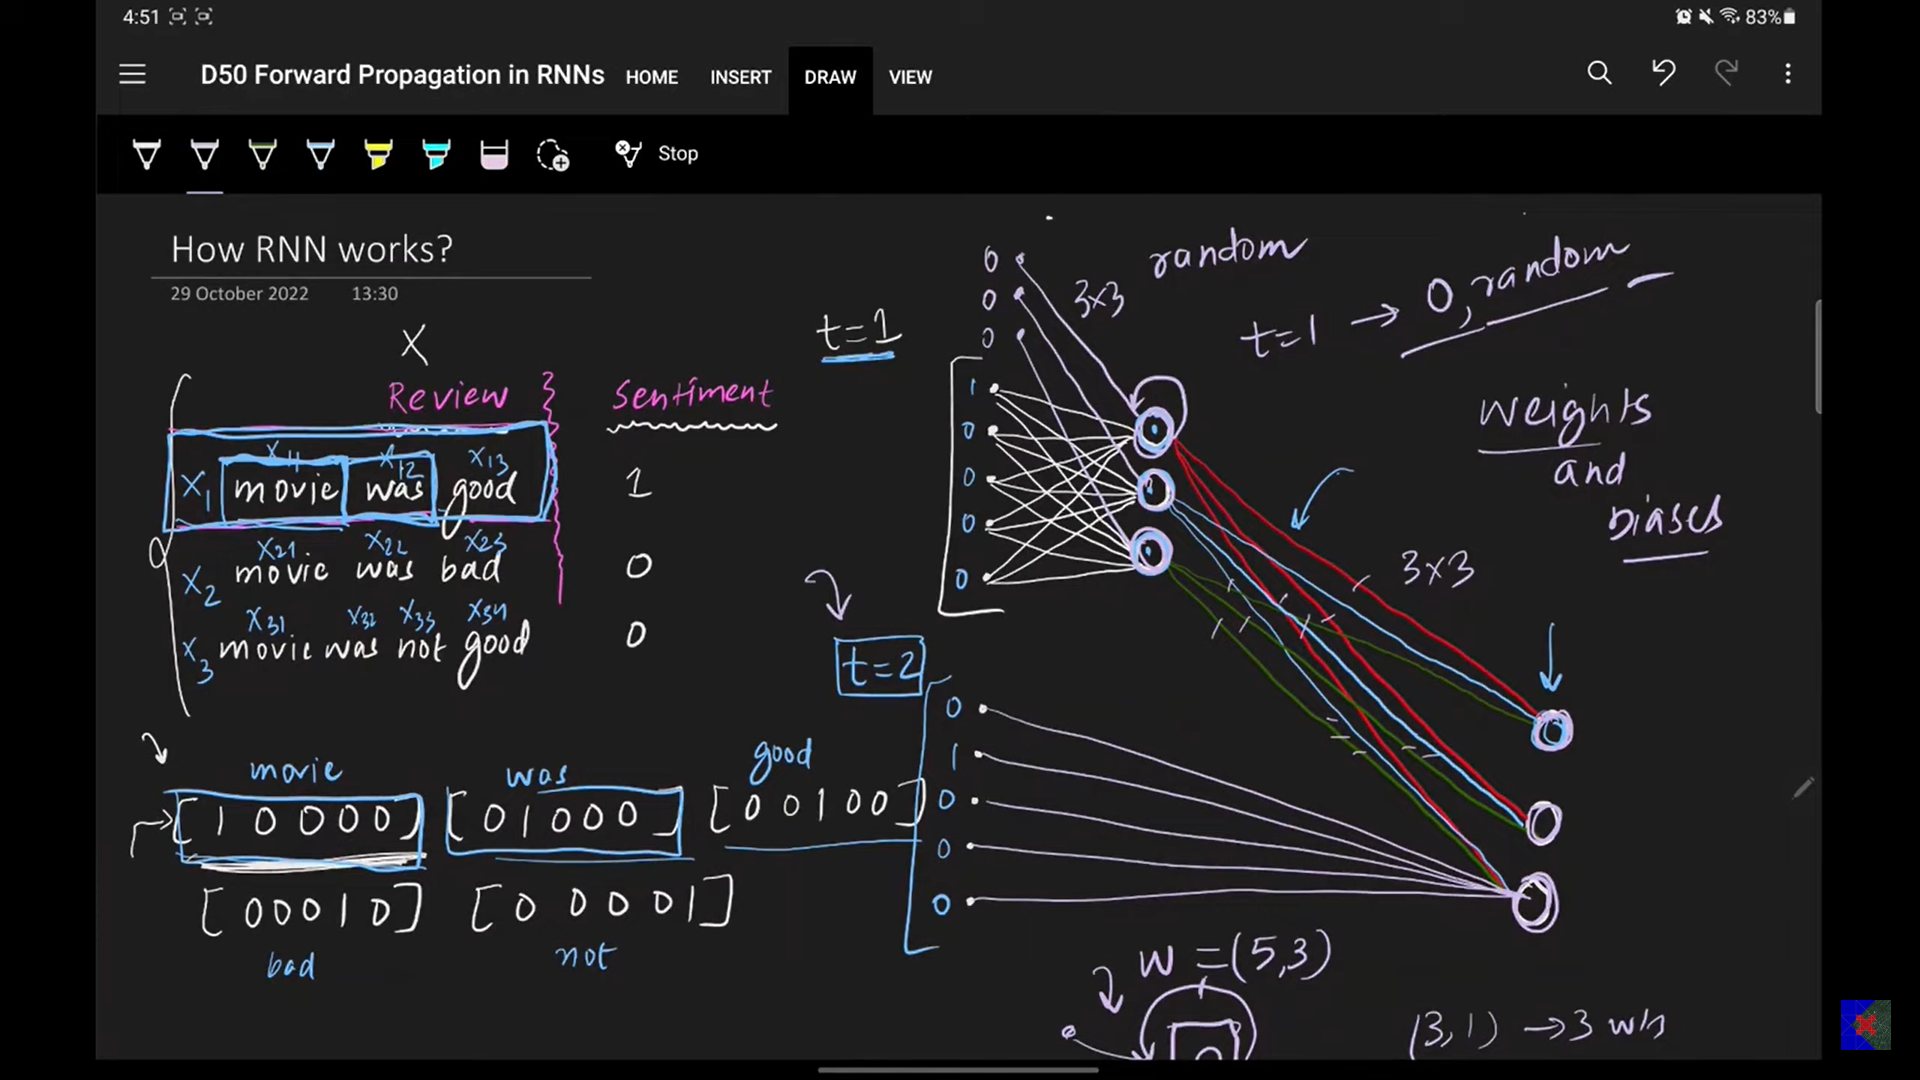

In [ ]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(4,5))) # timestamp max =4 and input=5
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 3)                   │              27 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(model.get_weights()[0].shape) # hidden weight
print(model.get_weights()[0])

(5, 3)
[[-0.6336472   0.33537692 -0.22826374]
 [-0.35152507  0.84374756 -0.20407581]
 [ 0.04779083  0.70060235  0.7198605 ]
 [ 0.3708505   0.14594573 -0.80285245]
 [-0.13863188  0.22237116  0.605529  ]]


In [ ]:
print(model.get_weights()[1].shape) #feed back weight
print(model.get_weights()[1])

(3, 3)
[[-0.927143    0.22113805  0.30249622]
 [-0.34680238 -0.81211853 -0.46924582]
 [ 0.14189468 -0.5399644   0.82964116]]


In [ ]:
print(model.get_weights()[2].shape) # hidden bias
print(model.get_weights()[2])

(3,)
[0. 0. 0.]


In [ ]:
print(model.get_weights()[3].shape) # output weight
print(model.get_weights()[3])

(3, 1)
[[ 1.010063  ]
 [ 0.42651522]
 [-0.3436489 ]]


In [ ]:
print(model.get_weights()[4].shape) #output bias
print(model.get_weights()[4])

(1,)
[0.]


# Forward Prop

X11= vector with 5D

these will be send one by one in the recurrent NN.

During forward propagation we use one concept that is called unfolding through time. The recurrent layer will act as loop.

t=1 we send first word.

It will calculate as ANN the. When input is given then it will calcaulate with weight dot product. That is X11.Wi thid will give (1,3).each node has activition function. then the put activation funtion f(X11Wi + b1) which will give O1(1,3)

t=2. we use same with network with same weight. X12 and and Wi plus we have O1 and Wh also . We will have calculation X12Wi + O1Wh + b1 this will send to activation function f(X12Wi + O1Wh + b) this will give O2(1,3).

Again t=3. X13 will be send and happen same thing. We will have f(X13Wi + O2Wh + b) give O3(1,3).

Since the word has finish we move. We have O3 which will do dot product with weight of another passing layer and add bias. f(O3Wi + b) with activation function . this will give output.

To make consistent we have O0 given during t=1 where O0 is random number.f(X11Wi + O0Wh + b1)

We called it recurrent because the hidden layer reappeared for each word. Here parameter sharing or weight sharing concept is use. We are processing in sequence


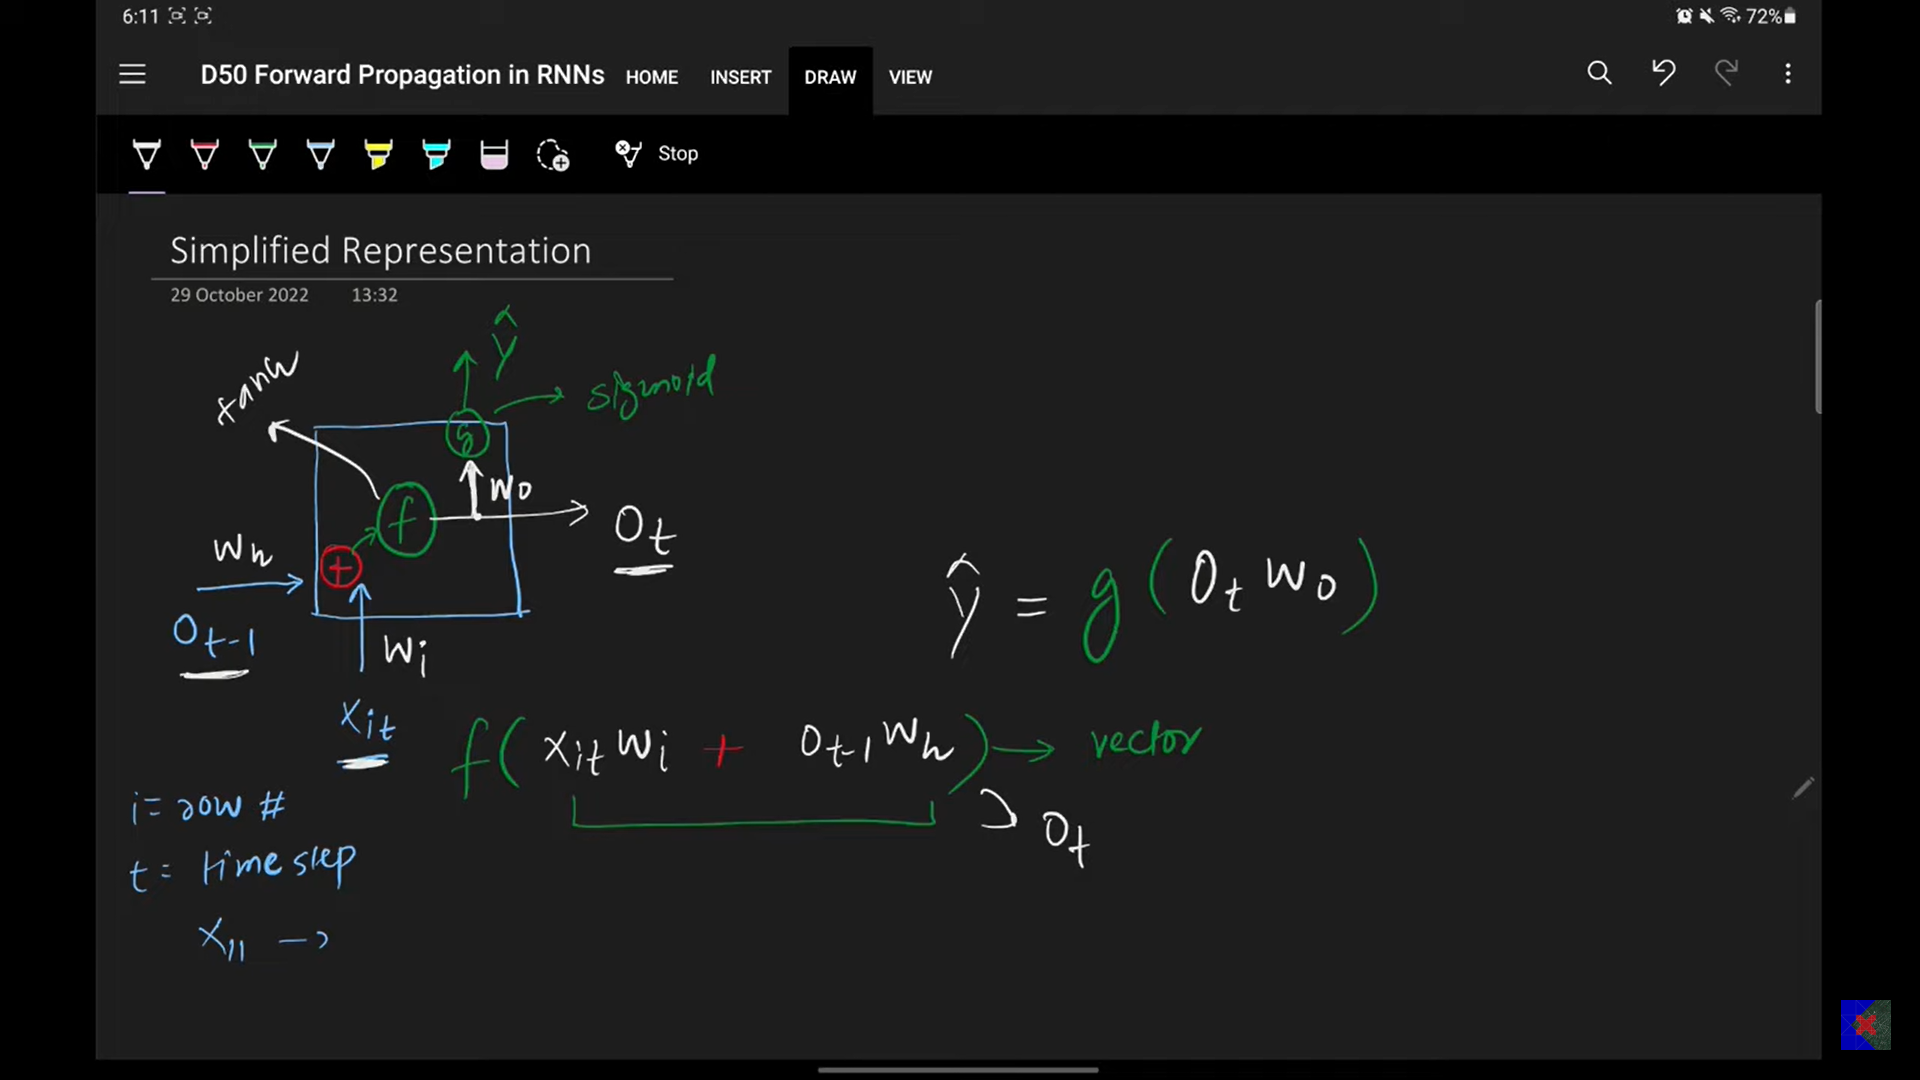

If it is the last then it will go throught the W0 and have do the activation function and give Yhat Otherwise ti will become Ot and become the input along with Xit

# PW(Sentiment Analysis)

We change text to numbers or vectors because RNN model only work with numbers or vectors.

We have two work flow to convert to number

1. Integer Encoding
2. Embeddings

## Integer Encoding

- First we form vocabulary. We check all unique word in data is form vocabulary.
- second, For each unique word we assign integer. We replace the sentence by it index integer value
- Third, we do padding Since the sentence have different size because the number of word are different. we have similar size by adding 0 at first or last at index
- We can now train in RNN

In [ ]:
import numpy as np

docs = ['I see birds',
        'they are flying high',
        'enjoying there time',
        'enjoying the open sky',]
        # make this integer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<nothing>')# it will assign as word <'nothing'> if the word is new
tokenizer.fit_on_texts(docs) # tokenizer the docs

In [ ]:
tokenizer.word_index # assign index

{'<nothing>': 1,
 'enjoying': 2,
 'i': 3,
 'see': 4,
 'birds': 5,
 'they': 6,
 'are': 7,
 'flying': 8,
 'high': 9,
 'there': 10,
 'time': 11,
 'the': 12,
 'open': 13,
 'sky': 14}

In [ ]:
tokenizer.word_counts # word repeat in docs

OrderedDict([('i', 1),
             ('see', 1),
             ('birds', 1),
             ('they', 1),
             ('are', 1),
             ('flying', 1),
             ('high', 1),
             ('enjoying', 2),
             ('there', 1),
             ('time', 1),
             ('the', 1),
             ('open', 1),
             ('sky', 1)])

In [ ]:
sequences = tokenizer.texts_to_sequences(docs) # sentence represted by integer
sequences

[[3, 4, 5], [6, 7, 8, 9], [2, 10, 11], [2, 12, 13, 14]]

In [ ]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post') # adding padding so all be similar size post means at last the sentence 0
sequences

array([[ 3,  4,  5,  0],
       [ 6,  7,  8,  9],
       [ 2, 10, 11,  0],
       [ 2, 12, 13, 14]], dtype=int32)

Doing in imdb data

In [ ]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train[0] # sentence is already converted to integer

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [ ]:
y_train[0]

1

In [ ]:
len(X_train[2]),len(X_train[1])

(141, 189)

In [ ]:
# we are doing padding and triming the data which is longer then 50
X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)

In [ ]:
len(X_train[2]),len(X_train[1])

(50, 50)

In [ ]:
model = Sequential()

model.add(SimpleRNN(32,input_shape=(50,1),return_sequences=False)) # 50 is timestep, return_sequences=False means it doesnot show to programer each output of each timestep
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.5020 - loss: 0.7949 - val_accuracy: 0.5056 - val_loss: 0.6941
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.5067 - loss: 0.6933 - val_accuracy: 0.5032 - val_loss: 0.6942
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5083 - loss: 0.6925 - val_accuracy: 0.5052 - val_loss: 0.6960
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5074 - loss: 0.6922 - val_accuracy: 0.5025 - val_loss: 0.7031
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.5113 - loss: 0.6931 - val_accuracy: 0.5020 - val_loss: 0.6970


## Embedding

In NPL, word embedding is a term used for the representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning

After looking whole document, they convert each word in vector. This vector is dense(value non-zero) where dimension become less. Embedding caught the semantic meaning which it understand the context.

Before in Integer encoding we do padding where we assign 0. If vaule are zero which no meaning then it is sparse data representation.

In DL, the model we are making at training process we can learn embedding. In kears there is embedding layer.

In RNN model, at first we can place embedding layer which automaticly create dense representation of every word and this representation is send to RNN.

In keras, it is easy to do embedding. we have to make sure the data we are puting in embedding layer must be integer encoded

In [ ]:
import numpy as np

docs = ['I see birds',
        'they are flying high',
        'enjoying there time',
        'enjoying the open sky',]
        # make this integer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(docs) # tokenizer the docs

In [ ]:
len(tokenizer.word_index)

13

In [ ]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[2, 3, 4], [5, 6, 7, 8], [1, 9, 10], [1, 11, 12, 13]]

In [ ]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post') #padding
sequences

array([[ 2,  3,  4,  0],
       [ 5,  6,  7,  8],
       [ 1,  9, 10,  0],
       [ 1, 11, 12, 13]], dtype=int32)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN
model = Sequential()
model.add(Embedding(13, output_dim=2, input_length=4))# add embedding layer (total vocab word, dense represent vector dimension, input shape (length in sentence))
model.add(SimpleRNN(64, return_sequences=False))  # RNN layer with 64 units
model.add(Dense(1, activation='sigmoid'))


in embedding=> this give the ouput of two dimension of each word

we have X= [ 2,  3,  4,  0]

it have 13 input that pass through 2 node and  X will converted to: for 2 [X1,X2] for 3[X1,X2] for 4[X1, X2] for 0[X1,X2]

In [ ]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.(X_train,y_train),(X_test,y_test) = imdb.load_data()
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)

In [ ]:
model = Sequential()
model.add(Embedding(10000, 2,input_length=50))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - acc: 0.5048 - loss: 0.6923 - val_acc: 0.7004 - val_loss: 0.5988
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.7528 - loss: 0.5032 - val_acc: 0.8052 - val_loss: 0.4287
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - acc: 0.8553 - loss: 0.3457 - val_acc: 0.7990 - val_loss: 0.4390
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - acc: 0.8833 - loss: 0.2986 - val_acc: 0.7952 - val_loss: 0.4567
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.8987 - loss: 0.2612 - val_acc: 0.7841 - val_loss: 0.4832


In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 50, 2)               │          20,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 32)                  │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,461 (247.90 KB)

 Trainable params: 21,153 (82.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42,308 (165.27 KB)

# Types of RNN

1. Many to One
2. One to Many
3. Many to Many


## Many to One

input --> sequence --> sequence, character, timeseries

output --> non-sequencal --> int/num ---> scalars

For example:-sentiment analysis= we have sequence of input data in sentence and we need to find output is it positive or negative.

Rating Prediction= we have the movie review by user as input data and we have to find output how much rating do user give 1 to 5.





## One to Many

input --> normal non-sequential --->

output --> sequentials -> in sentence

one input give many output

For example-> image captioning = we send image as input data and get output as text caption

## Many to Many

input --> sequencial data

output --> sequencial data

It has also 2 kind:

1. same length = input sequence == output sequence. For example:- pos tagging= My name is Nitesh. My= pronoun, name= noun, is=verb, Nitesh = noun.

2. variable length = input data length not equal ouput data lenth. For eg: Machine translation. one language to another language.

# Backpropagation

Backpropagation through time.





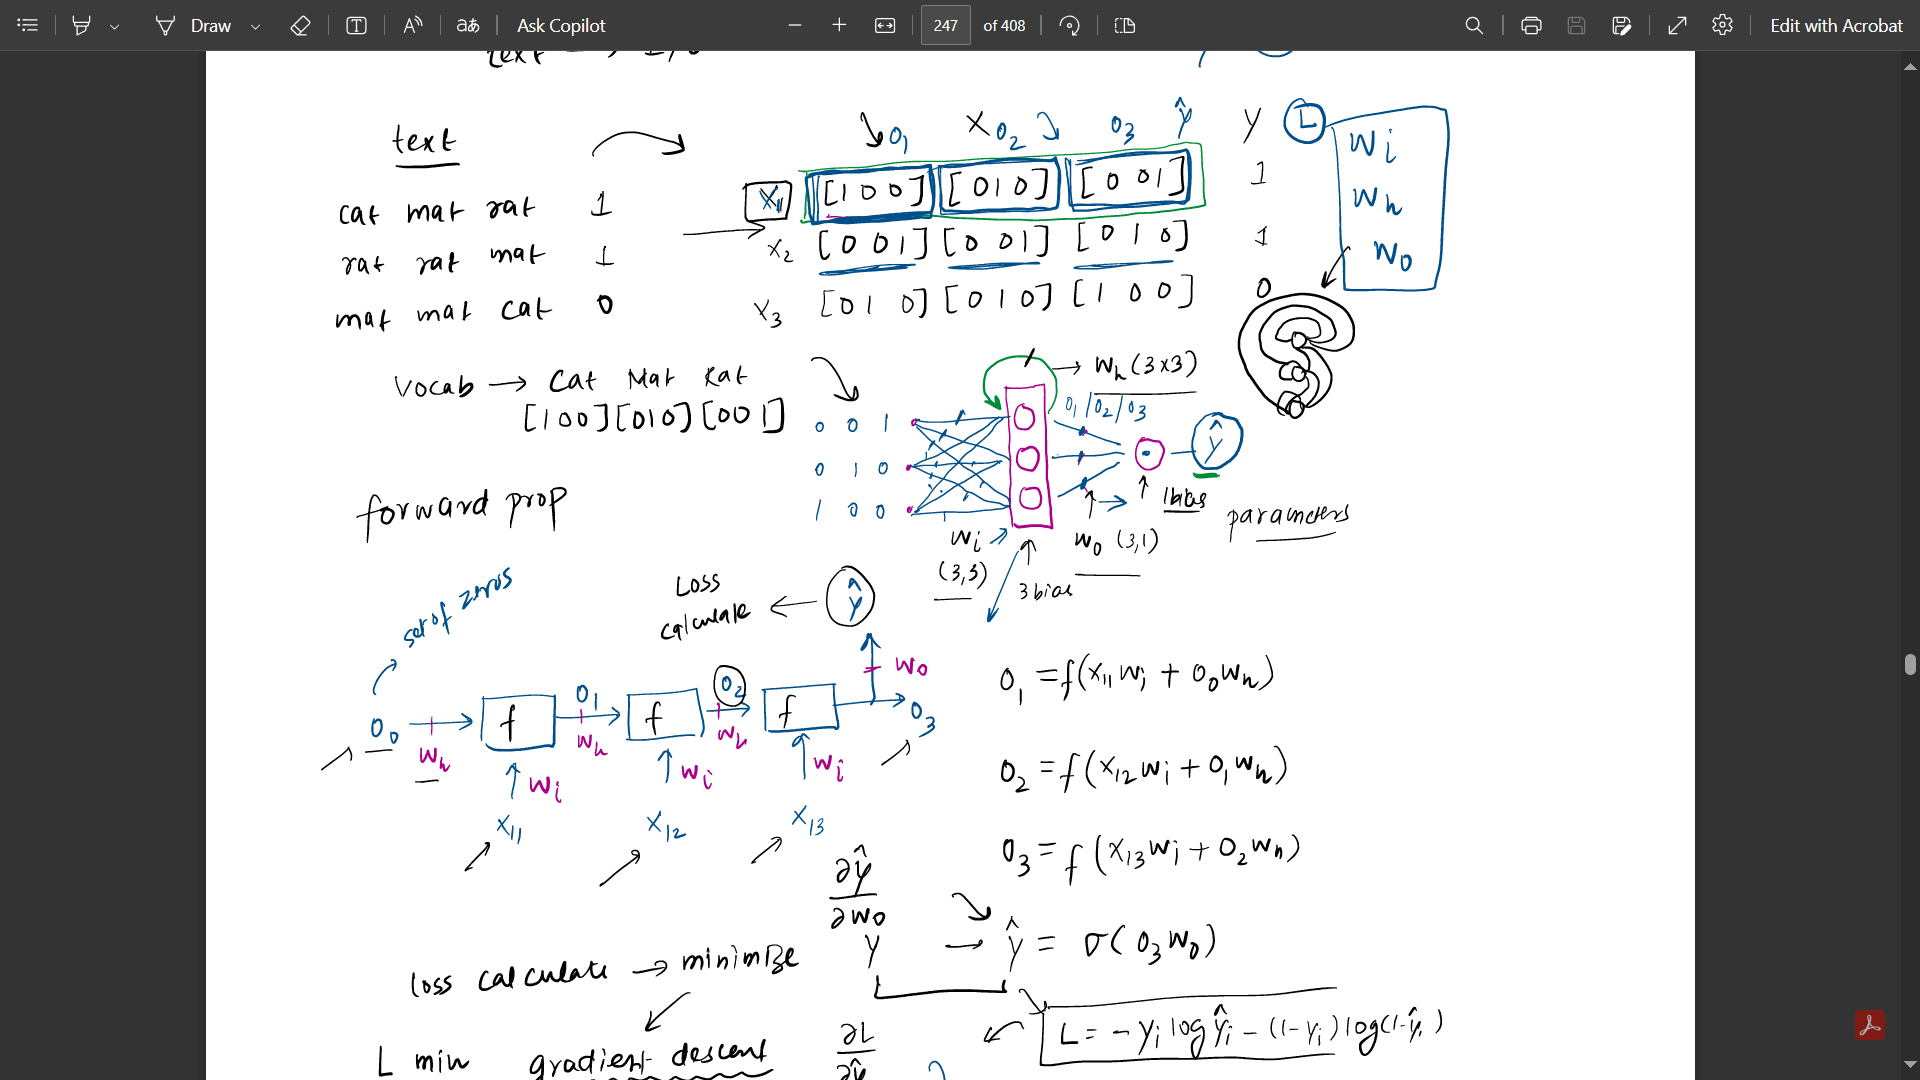

calculate loss L = -Yi logYi hat - (1-Yi) log(1-Yi hat)

we need to minimize the loss and the way to minimize is gradient descent.

Find the parametrics(weight and bias) value whose give L minimum

Wi= Wi - lr (dL/dWi)

Wh= Wh - lr (dL/dWh)

Wo= Wo - lr (dL/dWo)

Now, we need to calculate the derivates: (dL/dWi), (dL/dWh), (dL/dWo)

We need to find (dL/dWo) first because it is near the output and in backpropagation we need to start from backward.

L depend on Yhat because Y is constant.

Y hat is calculated by:

Yhat = sigmoid(O3W0)

O1 = f(Xi1Wi + O0Wh)

O2 = f(Xi2Wi + O1Wh)

O3 = f(Xi3Wi + O2Wh)

Yhat is depend on O3 and W0

(dL/dWo) = dL/dYhat . dYhat/dWo

do the difference putting value of L and Yhat.solve this.


Next, dL/dWi. similary L depend on Yhat and Yhat depend on O3 and Wo. O3 depend on Xi3, Wi, O2 and Wh. O2 depend Xi1, Wi, O1 and Wh. O1 is depend on Xi1, Wi, O0 and Wh.

dL/dWi = (dL/dYhat . dYhat/dO3 . dO3/dWi) + (dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dWi) + (dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dO1 . dO1/dWi)

there is 3 terms because RNN unfold time(t=3) is 3 times. It t=3 because it has 3 vocab in one row. For exampleif it has 12 vocab then it will have t =12 and has 12 terms.

dL/dWi = E j-1 to 3 dL.dYhat . dYhat/dOj . dOj/dWi

j =1 then dL/dYhat . dYhat/dO1 . dO1/dWi

j =1 give (dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dO1 . dO1/dWi)


j=2 then dL/dYhat . dYhat/dO2 . dO2/dWi

j=2 give (dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dWi)

j=3 then (dL/dYhat . dYhat/dO3 . dO3/dWi)

this mean:

dL/dWi = E j-1 to 3 dL.dYhat . dYhat/dOj . dOj/dWi

=(dL/dYhat . dYhat/dO3 . dO3/dWi) + (dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dWi) + (dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dO1 . dO1/dWi)


this means have formula:

dL/dWi = E j=1 to n dL.dYhat . dYhat/dOj . dOj/dWi, where n is timesteps

Now, dL/dWh. similary L depend on Yhat and Yhat depend on O3 and Wo. O3 depend on Xi3, Wi, O2 and Wh.O2 depend Xi1, Wi, O1 and Wh. O1 is depend on Xi1, Wi, O0 and Wh.

dL/dWh = dL/dYhat . dYhat/dO3 . dO3/dWh +(dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dWh) + (dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dO1 . dO1/dWh)

dL/dWh = E j=1 to n dL.dYhat . dYhat/dOj . dOj/dWh, where n is timesteps

# Problem with RNN

RNN suffer from 2 major problems:
1. Problem of long term dependency
2. Unstable training

both problem come from unstable gradients

## Problem of long term dependency



In RNN we have sequencial data where each data depend on previous data. If the sequence become big that means number of timesteps become bigger then the front data won't remember very old data. This is problem of long term dependency.

For example: next word predictor app. Nepali people speak ____. In the gap it predict Nepali which is correct. Since it doesnot need to remember for long timesteps.

But, If the i had paragraph. Ram love playing football. He always play whenver he have free time. Ram has his own ____ . The answer need to be football. But RNN won't able to predict because it was long dependency. It doesnot remember very long old data.

This problem rise from Vanishing Gradient Problem.

for t=3, we have

dL/dWi = short'(dL/dYhat . dYhat/dO3 . dO3/dWi)' + (dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dWi) + long'(dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dO1 . dO1/dWi)'

what if t=100 then:

dL/dWi= long'dL/dYhat . dYhat/dO100 . dO100/dO99 . ........ dO1/dWi'

the long term dependency become so small when we calculate the gradient.So, to calculate the dL/dWi gradient depend on short term. Long term has very less contribution

'dL/dYhat . dYhat/dO100 . dO100/dO99 . ........ dO1/dWi' this can be written as:

dL/dYhat . dYhat/dO100 π t=2 to 100 (dOt/dO t-1) dO1/dWi

π t=2 to 100 (dOt/dO t-1) = (dO100/dO99). (dO99/dO98).(dO98/dO97)........(dO2/dO1)

we have (dOt/dO t-1) if O1 activation function is tanh then 01= tanh(Xi1Wi + O0Wh)

then Ot =  tanh(XitWi + Ot-1 Wh)

then (dOt/dO t-1) = tanh`(XitWi + Ot-1 Wh) * Wh

tanh give value betweeen 0 to 1 and if we say Wh is between 0-1 then it will be close to 0 . that means it is very very small number. So, it will have minimal impact

Now, this is:

dL/dYhat . dYhat/dO100 π t=2 to 100 (tanh`(XitWi + Ot-1 Wh) * Wh) dO1/dWi

This whole will have minimal impact. So, if long term dependency is small then the short term has more dependency. That means output is more dependened on recent term.

this is VGP.





**Solution:**

1. Use different activation function than tanh. Use relu/leaky relu
2. Better weights init: make 1 or create identity matrix
3. skip RNNs
4. use LSTM

##Unstable training


In RNN, we have problem of unstable training because of exploding gradient problem.

Long term dependency has become so much big that it start to dominate short term dependency.Long term dependency may become infinte and it become infinte means weight become inifnte also.

- When for example we use relu as activation. relu derivate is any positive and weight is 1. So, each time we multiple it will become more and more bigger. and long term will blow-up.

- when lr is big


**solution**

1. Gradient Clipping: make a limitation of max of gradient.
2. Controlled learning rate:
3. use LSTM

# LSTM

Here, we have 2 route: STC(short term context) and LTC(long term context)

Short term Memory : Current story. It just store current inputs.

Long term Mermory : From short term memory send to long term memory so that it can reach till end unless it remove from LTM. This will remember old story.

**Difference between RNN and LSTM**

1. RNN has one state but LSTM has two state: STM and LTM
2. RNN has simple architecture but LSTM has difficult architecture. LSTM has difficult architecture because STM and LTM need to communicate. If need thing arrive in STM it send to LTM and if something need to be remove from LTM then STM need to communicate. We need to make difficult architecture to make communication.

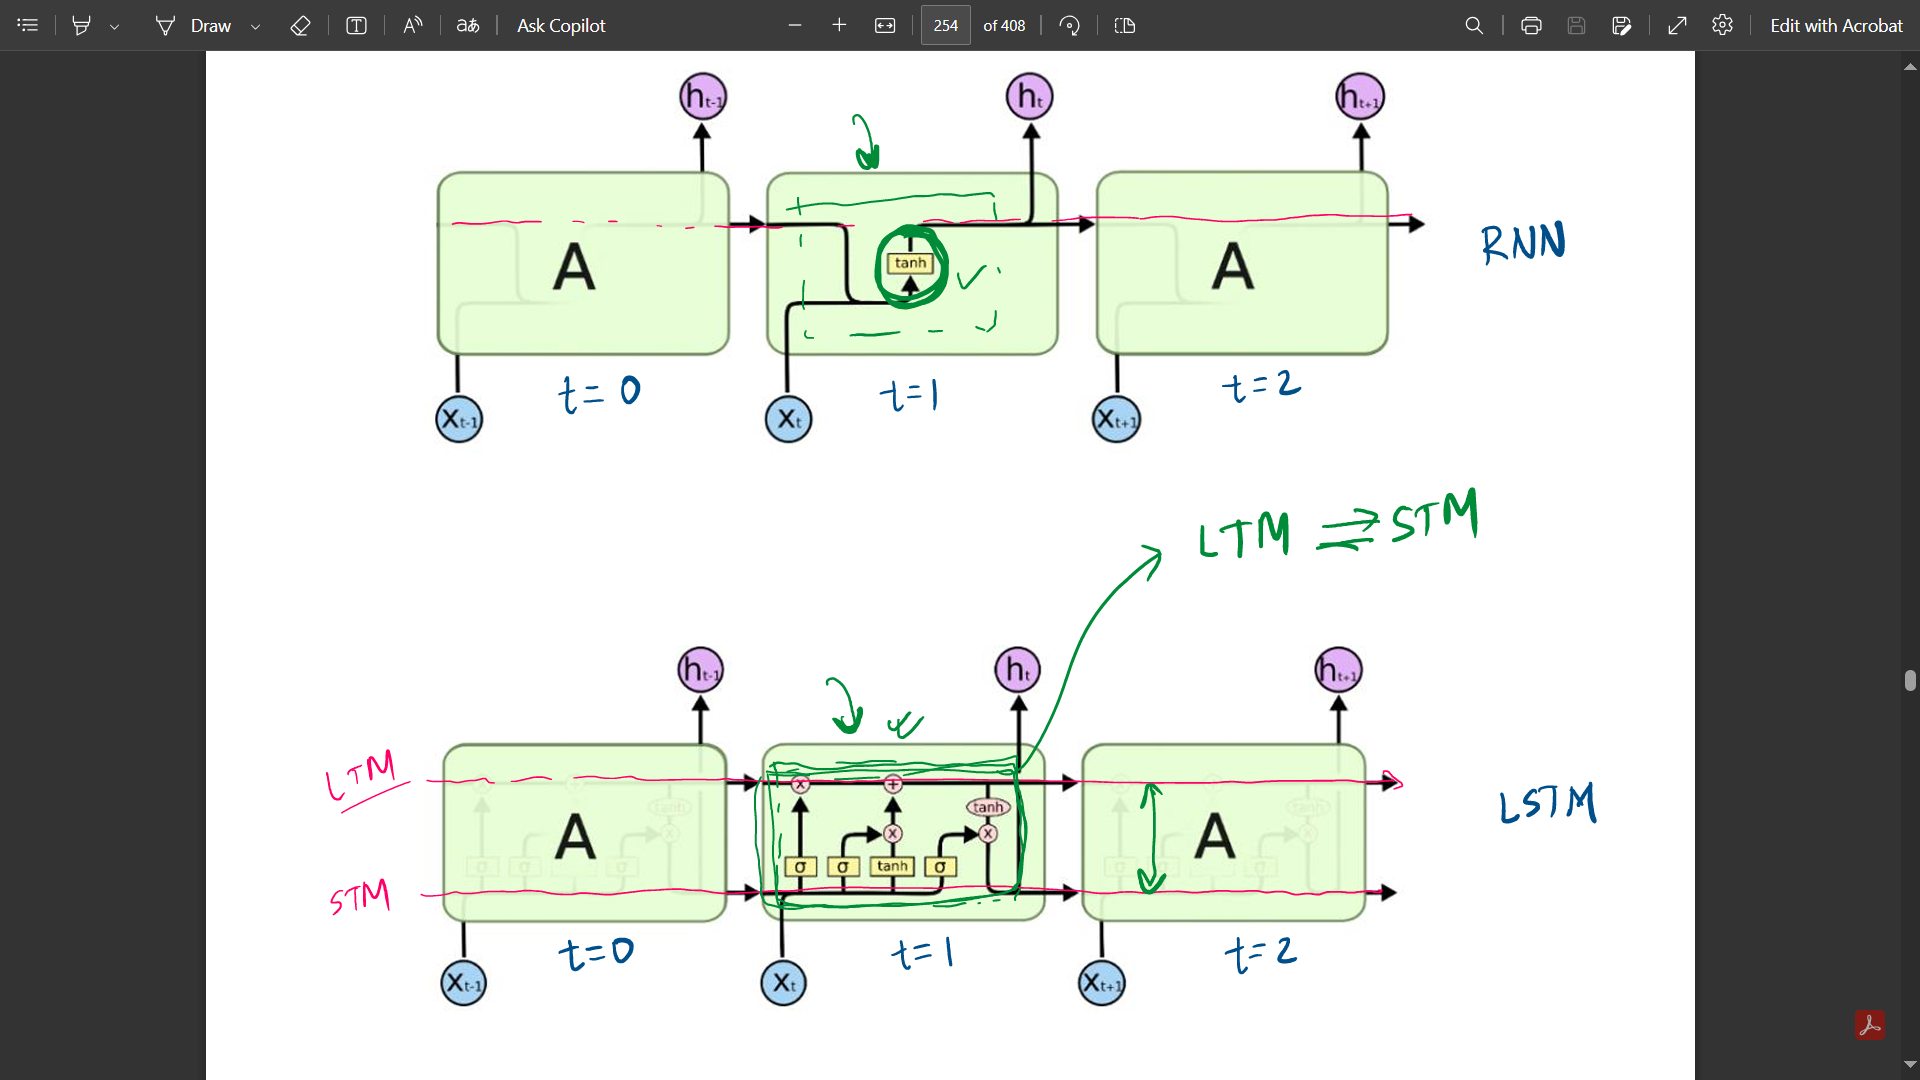

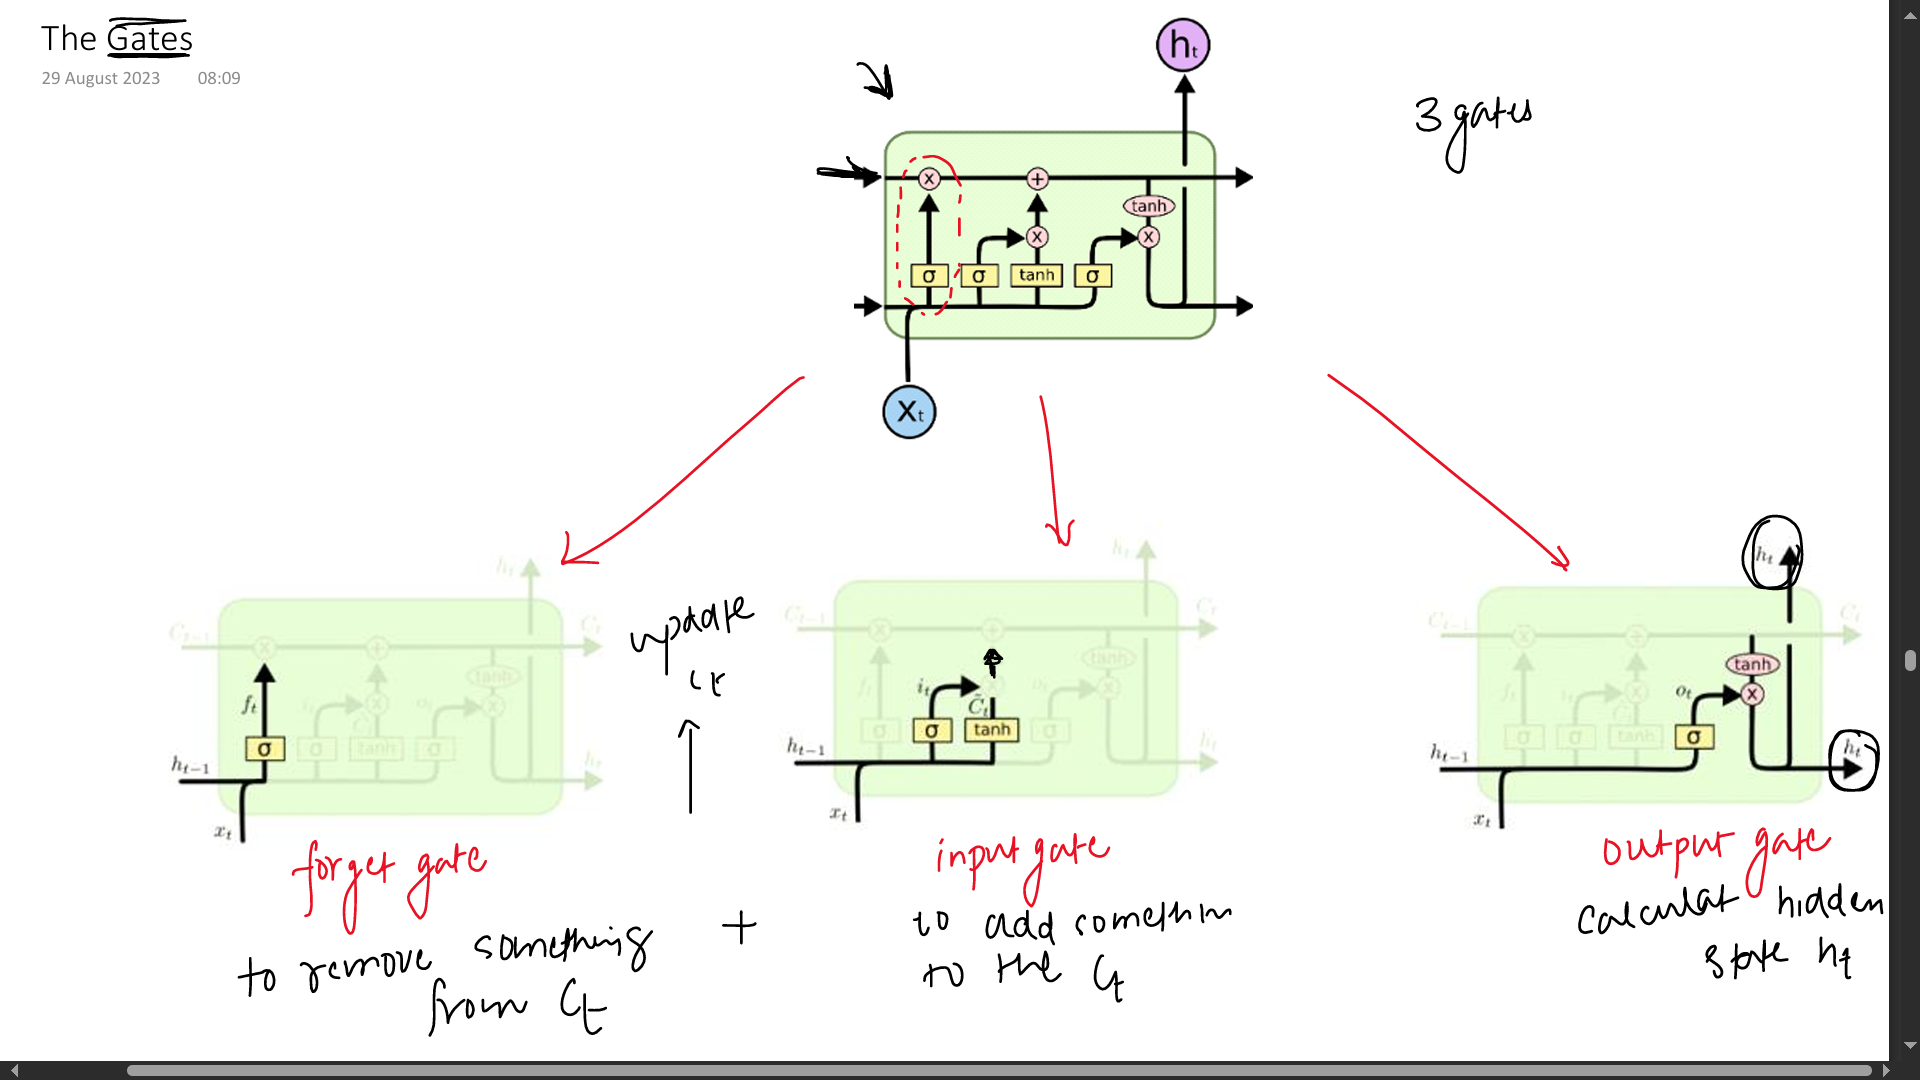

## Architecture

timestamp (t) =t

we give input from LTM C_t-1 (prev cellstate) called cellstate and STM h_t-1(prev hidden state) and current word Xt(input current time t1).

There will be some processing. And in output, it will give C_t(current cellstate) and h_t(currrent hidden state) for another state

Inside, we update the LTM and you create STM. Update the cell state C_t LTM and calculate h_t STM both will be sent to next state

In update Cellstate C_t0 to C_t1 two operation happen:
1. we decide what need to remove from LTM C_t0 after getting X_t
2. What need to be add new from X_t

**What are C_t and h_t?**

C_t and h_t are vectors. Dim of C_t and h_t are equal.

**What is X_t?**

It is vector. we do text vectoriztion to convert sentence to vector. X_t dim can be larger or smaller or equal to C_t and h_t

f_t = in forget gate

i_t and bar(C_t) = in input gate. bar(C_t) is called candidate cellstate

O_t = in output gate

These all are vector and they have same diminsion as C_t and h_t

**Pointwise Operations**
The operation happen between two vector whose dimension are same and give same dimension vector. *, + are operation

Pointwise * = for example: C_t-1[4 5 6] * h_t-1[1 2 3] = [4 10 18]

pointwise + = for example: C_t-1[4 5 6] + h_t-1[1 2 3] = [5 7 9]

pointwise tanh =  for example: C_t-1[4 5 6] . tanh(4) = 0.26, tanh(5)= 0.34, tanh(6) = 0.53 = [0.26 0.34 0.53]



**NN layers:**

Similary to ANN, it also have NN. the sigmoid and tanh are neuron with that particular activation function. The number of neuron is decide by us as hyperparameter and this all have equal number of neuron in each layer.

### The Gate

**Forget Gate**:
based on the current input(Xt) and STM context it decide what to remove from LTM.

Input = C_t-1, h_t-1 and X_t

Output = from cellstate you will remove something which are not important in long term context

For example:

Number of node or neuron = 3 with activation function sigmoid each and X_t is 4 dim vector [Xi1 Xi2 Xi3 Xi4]. the dimension of C_t-1, h_t-1 become 3 because number of neuron is equal the dimension of C_t-1, h_t-1.

In forget gate, it work in 2 stage:
1. calculate f_t
2. you take c_t-1 * f_t pointwise multiplication. This operation quantity meaning is you are removing something from cellstate which was in LTC.

In NN two input is comming: h_t-1, X_t. h_t-1 is full connected to neuron and X_t also full connected to neuron. The weight will W_3*7. 3 because 3 neuron and 7 means 3 h_t-1 and 4 X_t. We will have 21 weights and each neuron had biases. These 3 neuron will give 3 output: f1, f2, f3 which can be collectively put in one vector [f1 f2 f3] and this vector is f_t and has dimension 3.

f_t = sigmoid(w_f[h_t-1, X_t] + b_f)

we C_t-1 coming from previous LTM and f_t as ouput from forget gate. Now,
c_t-1 * f_t pointwise multiplication. This give 3D flow forward. This vector represent that you take C_t-1 and remove somthing.

For example: C_t-1 = [4 5 6] and f_t= [1/2 1/2 1/2] and when we do elementwise multiplication we have [2 2.5 3]. This means it remove half of it.

 if C_t-1 = [4 5 6] and f_t= [1 1 1] and when we do elementwise multiplication we have [4 5 6]. This means you remove nothing

 if C_t-1 = [4 5 6] and f_t= [0 0 0 ] and when we do elementwise multiplication we have [0 0 0]. This means you remove everything

 f_t has power how much information it would let to cross from C_t-1. So, it is called gate




**Input Gate**: based on current input decide in LTM what new need to be added

when you think and add forget gate and input gate together, they are actually updating cellstate C_t

If you think you need add some inportant info to the C_t then input gate is use.

Stage:

1. bar(C_t) candidate cell state. Based on X_t and h_t-1 we find some value that are capable to be added.
2. i_t: now i_t decide from candidate cell state which values actually add in cellstate
3. we calculate C_t current cellstate.

Number of node or neuron = 3 with activation function sigmoid each and X_t is 4 dim vector [Xi1 Xi2 Xi3 Xi4]. the dimension of  h_t-1 is 3-D because number of neuron is equal the dimension of h_t-1.

1. In NN two input is comming: h_t-1, X_t. h_t-1 is full connected to neuron and X_t also full connected to neuron. The weight will W_3*7. 3 because 3 neuron and 7 means 3 h_t-1 and 4 X_t. We will have 21 weights and each neuron had biases. These 3 neuron will give 3 output: we assigning all 3 ouput and it is bar(C_t). This full structure equation is:

  bar(C_t) = tanh(Wc[h_t-1,X_t] + bc)

  bar(C_t) = potential important info

2. Now, i_t similarly,
In NN two input is comming: h_t-1, X_t. h_t-1 is full connected to neuron and X_t also full connected to neuron of activation function sigmoid. The weight will W_3*7. 3 because 3 neuron and 7 means 3 h_t-1 and 4 X_t. We will have 21 weights(Wi) and each neuron had biases. These 3 neuron will give 3 output: we assigning all 3 ouput and it is i_t. This full structure equation is:

  i_t=sigmoid(tanh(Wi[h_t-1,X_t] + bi))

3. now we will have pointwise multiplation i_t and bar(C_t) and give bar(C_t`) filtered candidate cellstate

final cellstate C_t = (f_t * c_t-1) + (i_t * bar(C_t))

this will go to another timestamp

For example if you donot want to change in C_t then f_t= [1 1 1] and c_t-1=[2 3 4]
and (i_t * bar(C_t)) give [0 0 0] then

C_t = (f_t * c_t-1) + (i_t * bar(C_t))

=[2 3 4]

this mean nothing has change on C_t (LTM)

**Output Gate:**
based on current input and LTM decide what need to taken and show as output. It create STM.

to decide hiden state current timestamp

We have current cellstate c_t from this vector we decide what will be h_t. we do mathmatical operation to give h_t. So, we can say h_t come from c_t

1. we calculate tanh(C_t) of each vector element of it. After achiving tanh(C_t) we do filteration. For this filteration we need O_t

To calculate O_t: 3 neuron with sigmoid activation and 3_D h_t-1 and 4-D X_t. We will have 3*7 = 21 weight Wo and biases bo
then

O_t = sigmoid(w_o[h_t-1, X_t] + b_o)

After getting O_t and tanh(C_t) we do elementwise multiplication and get h_t

h_t = [O_t * tanh(C_t)]

# PW (Next Word Predictor)

FAQ about mental health

In [ ]:
faq= """Q.  What is mental health?
We all have mental health which is made up of our beliefs, thoughts, feelings and behaviours.
Q.  What do I do if the support doesn’t help?
It can be difficult to find the things that will help you, as different things help different people. It’s important to be open to a range of approaches and to be committed to finding the right help and to continue to be hopeful, even when some things don’t work out.
Q.  Can you prevent mental health problems?
We can all suffer from mental health challenges, but developing our wellbeing, resilience, and seeking help early can help prevent challenges becoming serious.
Q.  Are there cures for mental health problems?
It is often more realistic and helpful to find out what helps with the issues you face. Talking, counselling, medication, friendships, exercise, good sleep and nutrition, and meaningful occupation can all help.
Q.  What causes mental health problems?
Challenges or problems with your mental health can arise from psychological, biological, and social, issues, as well as life events.
Q.  What do I do if I’m worried about my mental health?
The most important thing is to talk to someone you trust. This might be a friend, colleague, family member, or GP. In addition to talking to someone, it may be useful to find out more information about what you are experiencing. These things may help to get some perspective on what you are experiencing, and be the start of getting help.
Q.  How do I know if I’m unwell?
If your beliefs , thoughts , feelings or behaviours have a significant impact on your ability to function in what might be considered a normal or ordinary way, it would be important to seek help.
Q.  What should I do if I’m worried about a friend or relative?
This may depend on your relationship with them. Gently encouraging someone to seek appropriate support would be helpful to start with.
Q.  How do I deal with someone telling me what to do?
Some people may advise you on good evidence of what works with the best of intentions, but it’s important to find out what works best for you."""

A text generator: supervised learning problem

Change to vector

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
#change to vector
tokenizer = Tokenizer()
tokenizer.fit_on_texts([faq]) # since we can send multiple text we should put in [] because it is list

In [ ]:
tokenizer.word_index

{'to': 1,
 'what': 2,
 'help': 3,
 'be': 4,
 'q': 5,
 'and': 6,
 'mental': 7,
 'health': 8,
 'do': 9,
 'you': 10,
 'the': 11,
 'can': 12,
 'with': 13,
 'of': 14,
 'i': 15,
 'if': 16,
 'a': 17,
 'or': 18,
 'is': 19,
 'it': 20,
 'find': 21,
 'things': 22,
 'important': 23,
 'out': 24,
 'problems': 25,
 'your': 26,
 'someone': 27,
 'may': 28,
 'on': 29,
 'all': 30,
 'as': 31,
 'some': 32,
 'challenges': 33,
 'are': 34,
 'i’m': 35,
 'about': 36,
 'we': 37,
 'have': 38,
 'our': 39,
 'beliefs': 40,
 'thoughts': 41,
 'feelings': 42,
 'behaviours': 43,
 'support': 44,
 'different': 45,
 'people': 46,
 'it’s': 47,
 'prevent': 48,
 'from': 49,
 'but': 50,
 'for': 51,
 'more': 52,
 'helpful': 53,
 'issues': 54,
 'talking': 55,
 'good': 56,
 'worried': 57,
 'this': 58,
 'might': 59,
 'friend': 60,
 'in': 61,
 'experiencing': 62,
 'start': 63,
 'how': 64,
 'would': 65,
 'seek': 66,
 'works': 67,
 'best': 68,
 'which': 69,
 'made': 70,
 'up': 71,
 'doesn’t': 72,
 'difficult': 73,
 'that': 74,
 'will

In [ ]:
for sentence in faq.split('\n'):
  print(sentence)

Q.  What is mental health?
We all have mental health which is made up of our beliefs, thoughts, feelings and behaviours.
Q.  What do I do if the support doesn’t help?
It can be difficult to find the things that will help you, as different things help different people. It’s important to be open to a range of approaches and to be committed to finding the right help and to continue to be hopeful, even when some things don’t work out.
Q.  Can you prevent mental health problems?
We can all suffer from mental health challenges, but developing our wellbeing, resilience, and seeking help early can help prevent challenges becoming serious.
Q.  Are there cures for mental health problems?
It is often more realistic and helpful to find out what helps with the issues you face. Talking, counselling, medication, friendships, exercise, good sleep and nutrition, and meaningful occupation can all help.
Q.  What causes mental health problems?
Challenges or problems with your mental health can arise from 

In [ ]:
for sentence in faq.split('\n'):
  print(tokenizer.texts_to_sequences([sentence])[0]) # to remove double [] we pick the list 0 index value
   # change to sequence of vector

[5, 2, 19, 7, 8]
[37, 30, 38, 7, 8, 69, 19, 70, 71, 14, 39, 40, 41, 42, 6, 43]
[5, 2, 9, 15, 9, 16, 11, 44, 72, 3]
[20, 12, 4, 73, 1, 21, 11, 22, 74, 75, 3, 10, 31, 45, 22, 3, 45, 46, 47, 23, 1, 4, 76, 1, 17, 77, 14, 78, 6, 1, 4, 79, 1, 80, 11, 81, 3, 6, 1, 82, 1, 4, 83, 84, 85, 32, 22, 86, 87, 24]
[5, 12, 10, 48, 7, 8, 25]
[37, 12, 30, 88, 49, 7, 8, 33, 50, 89, 39, 90, 91, 6, 92, 3, 93, 12, 3, 48, 33, 94, 95]
[5, 34, 96, 97, 51, 7, 8, 25]
[20, 19, 98, 52, 99, 6, 53, 1, 21, 24, 2, 100, 13, 11, 54, 10, 101, 55, 102, 103, 104, 105, 56, 106, 6, 107, 6, 108, 109, 12, 30, 3]
[5, 2, 110, 7, 8, 25]
[33, 18, 25, 13, 26, 7, 8, 12, 111, 49, 112, 113, 6, 114, 54, 31, 115, 31, 116, 117]
[5, 2, 9, 15, 9, 16, 35, 57, 36, 118, 7, 8]
[11, 119, 23, 120, 19, 1, 121, 1, 27, 10, 122, 58, 59, 4, 17, 60, 123, 124, 125, 18, 126, 61, 127, 1, 55, 1, 27, 20, 28, 4, 128, 1, 21, 24, 52, 129, 36, 2, 10, 34, 62, 130, 22, 28, 3, 1, 131, 32, 132, 29, 2, 10, 34, 62, 6, 4, 11, 63, 14, 133, 3]
[5, 64, 9, 15, 134, 16, 35

In [ ]:
for sentence in faq.split('\n'):
  tokenized_sentence=tokenizer.texts_to_sequences([sentence])[0]

  for i in range(1,len(tokenized_sentence)):
    print(tokenized_sentence[:i],tokenized_sentence[i])

[5] 2
[5, 2] 19
[5, 2, 19] 7
[5, 2, 19, 7] 8
[37] 30
[37, 30] 38
[37, 30, 38] 7
[37, 30, 38, 7] 8
[37, 30, 38, 7, 8] 69
[37, 30, 38, 7, 8, 69] 19
[37, 30, 38, 7, 8, 69, 19] 70
[37, 30, 38, 7, 8, 69, 19, 70] 71
[37, 30, 38, 7, 8, 69, 19, 70, 71] 14
[37, 30, 38, 7, 8, 69, 19, 70, 71, 14] 39
[37, 30, 38, 7, 8, 69, 19, 70, 71, 14, 39] 40
[37, 30, 38, 7, 8, 69, 19, 70, 71, 14, 39, 40] 41
[37, 30, 38, 7, 8, 69, 19, 70, 71, 14, 39, 40, 41] 42
[37, 30, 38, 7, 8, 69, 19, 70, 71, 14, 39, 40, 41, 42] 6
[37, 30, 38, 7, 8, 69, 19, 70, 71, 14, 39, 40, 41, 42, 6] 43
[5] 2
[5, 2] 9
[5, 2, 9] 15
[5, 2, 9, 15] 9
[5, 2, 9, 15, 9] 16
[5, 2, 9, 15, 9, 16] 11
[5, 2, 9, 15, 9, 16, 11] 44
[5, 2, 9, 15, 9, 16, 11, 44] 72
[5, 2, 9, 15, 9, 16, 11, 44, 72] 3
[20] 12
[20, 12] 4
[20, 12, 4] 73
[20, 12, 4, 73] 1
[20, 12, 4, 73, 1] 21
[20, 12, 4, 73, 1, 21] 11
[20, 12, 4, 73, 1, 21, 11] 22
[20, 12, 4, 73, 1, 21, 11, 22] 74
[20, 12, 4, 73, 1, 21, 11, 22, 74] 75
[20, 12, 4, 73, 1, 21, 11, 22, 74, 75] 3
[20, 12, 4, 73, 

In [ ]:
input_sequences =[]
for sentence in faq.split('\n'):
  tokenized_sentence=tokenizer.texts_to_sequences([sentence])[0]

  for i in range(1,len(tokenized_sentence)):
    input_sequences.append(tokenized_sentence[:i+1])

In [ ]:
# since the row size not equal in input_sequences we use padding to make equal
max_len=(max(len(x) for x in input_sequences))


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_sequences(input_sequences,maxlen=max_len,padding='pre') # use padding pre means at first

array([[ 0,  0,  0, ...,  0,  5,  2],
       [ 0,  0,  0, ...,  5,  2, 19],
       [ 0,  0,  0, ...,  2, 19,  7],
       ...,
       [ 0,  0,  0, ...,  2, 67, 68],
       [ 0,  0,  0, ..., 67, 68, 51],
       [ 0,  0,  0, ..., 68, 51, 10]], dtype=int32)

In [ ]:
padded_input_sequences=pad_sequences(input_sequences,maxlen=max_len,padding='pre')

In [ ]:
X = padded_input_sequences[:,:-1] #everthing but no last
y = padded_input_sequences[:,-1] #only last

mult-class classifiction

In [ ]:
X.shape

(346, 60)

In [ ]:
y.shape

(346,)

In [ ]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y,num_classes=len(tokenizer.word_index)+1)
#OHE start from 0 but the tokenizer.work_index begin from 1 to it will miss last value so not to miss it we add +1

In [ ]:
y.shape

(346, 158)

In [ ]:
y[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

Till now we only converted word to vector

Now the real process start

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense

In [ ]:
model =Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=100,input_length=max_len-1))
model.add(LSTM(150))
model.add(Dense(len(tokenizer.word_index)+1,activation='softmax'))# all word prob and select highest prob


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Embedding convert each word to 100-D dense vector.

we are picking each vector and send to timestamp.

The overall output come from dense it send to dense layer where it get output with probablity.

highest prob is answer

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X,y, epochs=100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0209 - loss: 5.0600
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0258 - loss: 4.9438
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0645 - loss: 4.7537
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0575 - loss: 4.6358
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0823 - loss: 4.5902
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0587 - loss: 4.5806
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0767 - loss: 4.5068
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0989 - loss: 4.4090
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0997 - loss: 4.3396
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1143 - loss: 4.1937
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1195 - loss: 4.0747
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy

In [ ]:
import numpy as np
text="mental"

#tokenize
token_text=tokenizer.texts_to_sequences([text])[0]
#padding
pad_token_text=pad_sequences([token_text],maxlen=max_len-1,padding='pre')
print(pad_token_text)
#predict
pos=np.argmax(model.predict(pad_token_text))

#This give only one word
for word,index in tokenizer.word_index.items():
  if index == pos:
    print(word)


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
health


In [ ]:
import time
text = "It"
# for 10 word
for i in range(10):
  # tokenize
  token_text = tokenizer.texts_to_sequences([text])[0]
  # padding
  pad_token_text = pad_sequences([token_text], maxlen=max_len-1, padding='pre')
  # predict
  pos = np.argmax(model.predict(pad_token_text))

  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
It can
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
It can be
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
It can be difficult
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
It can be difficult to
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
It can be difficult to find
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
It can be difficult to find the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
It can be difficult to find the things
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
It can be difficult to find the things that
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
It can be difficult to find the things that will
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
It can be difficult to find the things that will help


# Gated Recurrent Unit (GRU)

GRU is nothing but a RNN architecture

LSTM architecture is complex and because off it complex architecture the number of parameter is huge. This means it will take lot of time to train. This was a big flaw with LSTM.

This problem is slove by GRU.

GRU has simplier architecture and has less parameter to train. So, it takes lesser time than LSTM. It performace is comparable to LSTM.



## Architecture

It only hidden state unlike LSTM two; cell state and hidden state. Hidden state carry both long term context and short term context.

It have only two gates:
1. Reset gate
2. Update gate

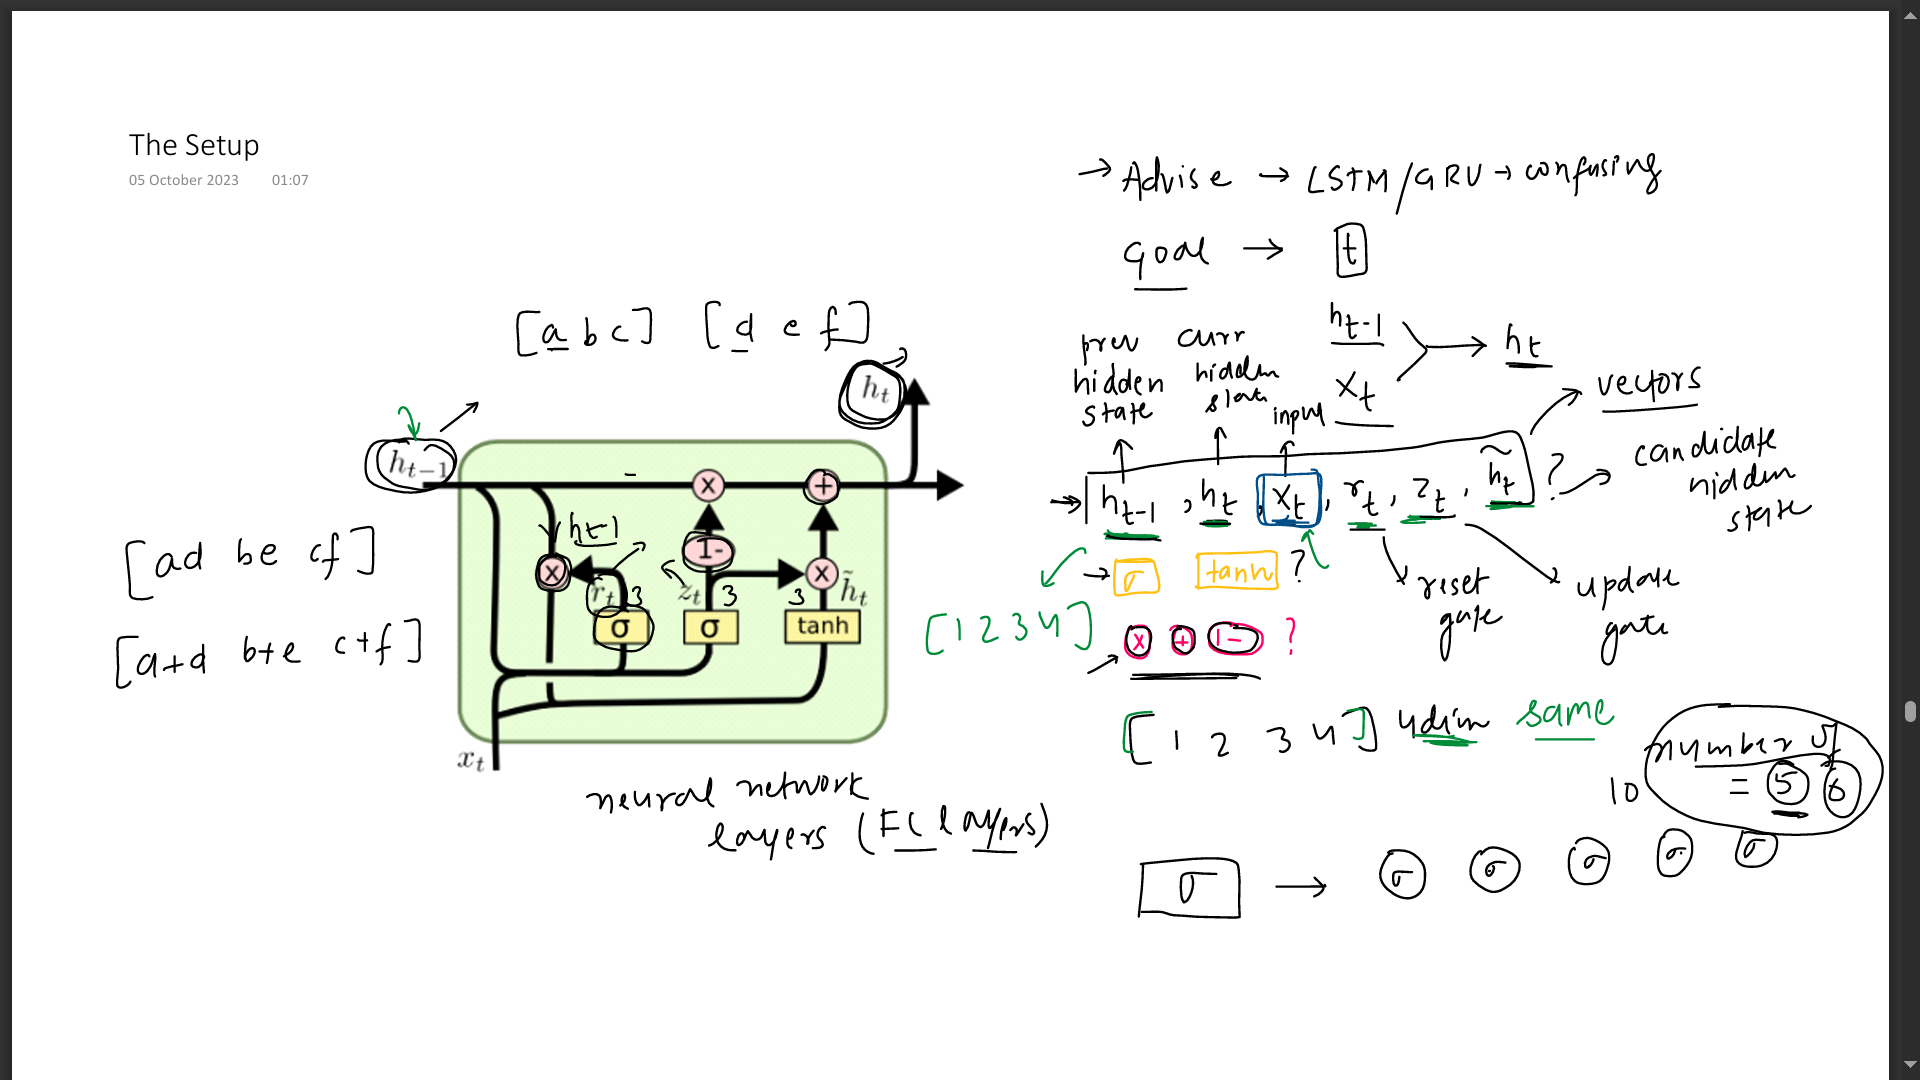

In timestamp t, we give two input h_t-1 and X_t and calculate current hidden timestamp h_t.

h_t-1, h_t, r_t, Z_t, tildeh_t) have similar dimension

Yellow box are NN layers (FC layers). If we assign 5 neuron i hyperparameter then all yellow box has same 5 neuron. And the dimension of h_t-1, h_t, r_t, Z_t, tilde(h_t)  will be 5-D except X_t.


Aim to calculate h_t from h_t-1 and X_t.Steps:

1. calculate r_t(reset gate)
2. calculate tilde(h_t) (candidate hidden state)
3. calculate Z_t(update gate)
4. calculate h_t(current hidden state)

h_t come from h_t-1 and tilde(h_t) and make them meet together we use Z_t.

Now, tilde(h_t) come from h_t-1 and X_t and to make them meet together we is r_t

**What exactly is hidden state?**

Hidden state is the memory of the system where context is stored. when we send timestamp by timestamp X_t(word) in the system they need to know the context what is happening.

The change in h_t is because of the role in rest gate and update gate

How do GRU make h_t from h_t-1?

-> It do in 2 steps:
1. from h_t-1, GRU make tilde(h_t)candidate memory or candidate hidden state.

  we have h_t-1 which have store overall context of story till now. Now, we send X_t (new sentence or sequence) new input. From X_t, we need to create new memory which is candidate memory tilde(h_t) to become h_t. tilde(h_t) has the potential to become h_t.

2. from tilde(h_t), It make h_t.

  since tilde(h_t) is heavily incline to X_t, we cannot make directly tilde(h_t) to h_t. We make balance between (h_t) and h_t-1 and make final context h_t


Conversion from h_t-1, GRU make tilde(h_t)candidate memory or candidate hidden state happen with the help of reset gate r_t.

Conversion from tilde(h_t), It make h_t happen with the help of update gate Z_t.

h_t-1 --- r_t --> tilde(h_t) --- Z_t --> h_t

**Calculation of reset gate r_t:**

r_t value of vector will be between 0-1. if r_t is 0 in particular dimension then it is closed for that dimension and if it is 1 then it is fully open for that dimension.

Reset gate, based on current input X_t, reset the some dimension of previous hiddent state h_t-1.

```r_t = sigmoid(Wr[h_t-1, X_t] + br)```

Wr= weight and br= biases

**Calculate of tilde(h_t) candidate hidden state**


Then we do elementwise multiplication:

```h_t-1 * r_t``` this is modulated resetted

To find tilde(h_t):

```tilde(h_t) = tanh(Wc[`h_t-1 * r_t, X_t] + bc)```

**To calculate update gate Z_t**

Z_t vector value is between 0-1. We have tilde(h_t) but we canot make directly this to h_t since it is heavily skew to current input X_t. So we need make balance between tilde(h_t) and h_t-1 to get h_t. For this we use Z_t. If the dimension is X_t is very important then it will give importance to tilde(h_t). If X_t is not need for the overall story then it will give importance to h_t-1.

Z_t is use to make balance betweeen tilde(h_t) and h_t-1 and give h_t

```Z_t= sigmoid(Wz[h_t-1, X_t] + bz)```

**To calculate h_t(current hidden state)**
```h_t = ((1-Z_t) * h_t-1) + (Z_t * tilde(h_t))```

If Z_t high then you give importance to candidate hidden state. If it is low then you give importance to previous hidden state




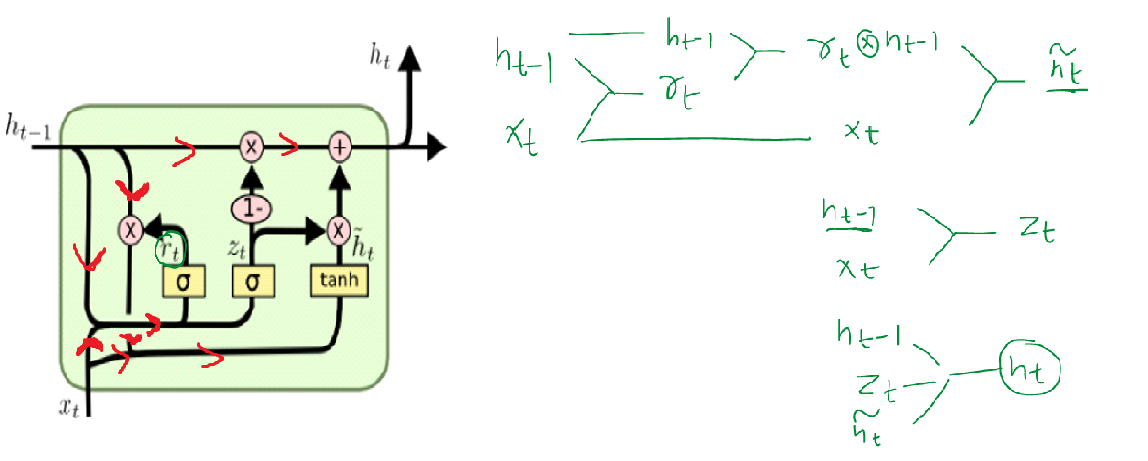

**LSTM VS GRU**

1. number of gate: LSTM(3) and GRU(2)
2. memory unit: LSTM (2 ct and ht) and GRU (1 ht)
3. parameter count: LSTM (more) and GRU(less)
4. Computational Complexity: LSTM (more due to extra gate and cell state) and GRU (less due to simple)
5. Empirical Performance: LSTM(good at more complex task) and GRU (good when limit data or simple task)
5. Choice in Practice: mostly GRU a first choice

# Deep RNN

Deep RNN is also called stack RNN.

Like ANN, we add hidden layers to which increase complexity of NN that increase the power of representation. This same concept is used in RNN then it is called Deep RNN.

Deep RNN is stacking RNN cell upon RNN cell to increase the complexity of model where hidden layer of 1 give input to hidden layer 2 which has come as output from hidden layer 1. Stacking verticaly RNN one above another and unfolding in time t is Deep RNN.

## Architecture

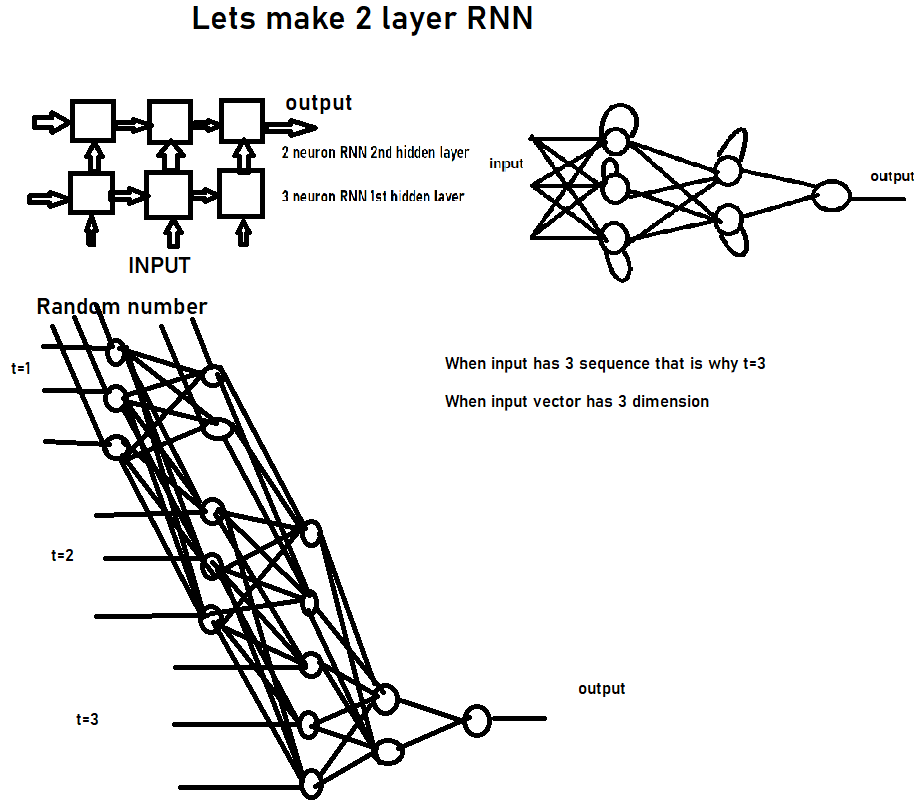

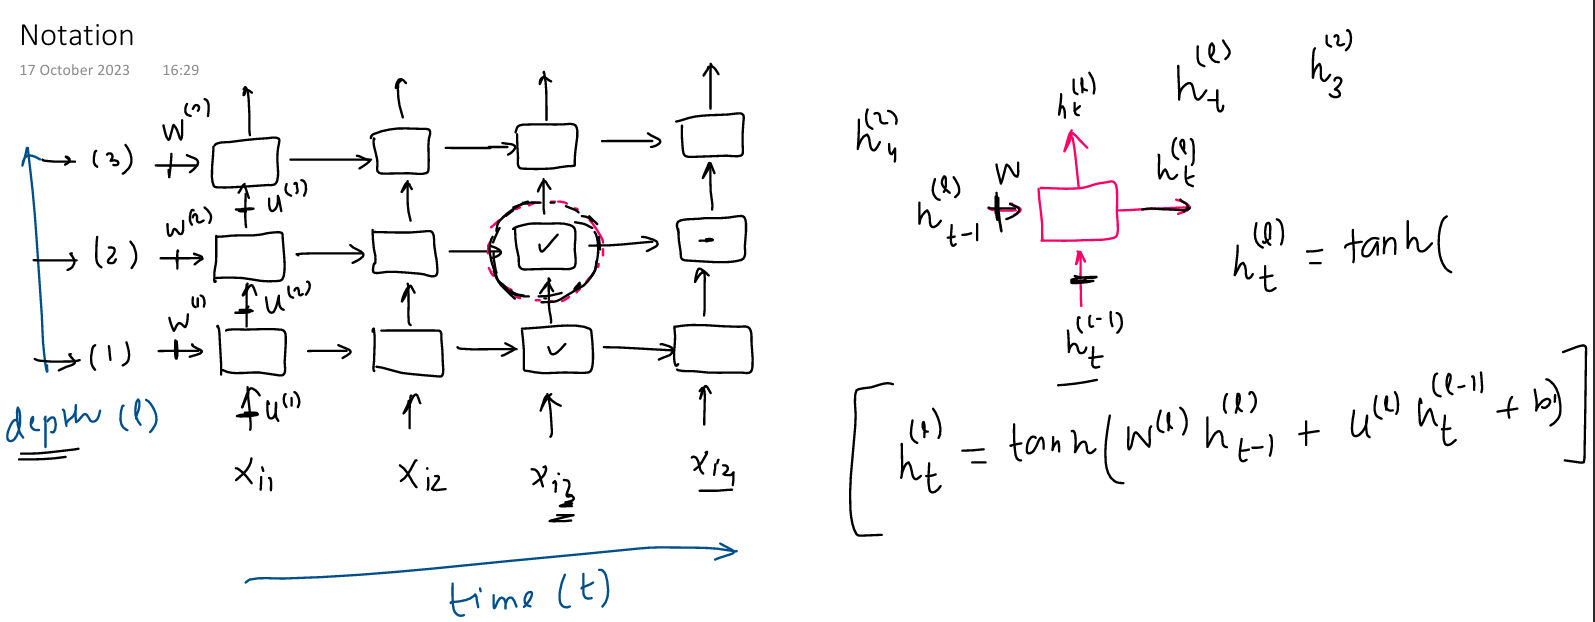

## why and when to use?

Two main reason:

1. Hierarchical Representation: premitive feature(word) detect by first layers and as you move to middle layers it find the sentecene feature. And you move higher layer it will find overall of the paragraph. So, deep RNN able to capture all of these.

2. Customization for Advanced Tasks: in encoder-decoder you use Deep RNN. For example: google translator

When to use:

1. complex tasks: speech recognization, machine traslation
2. Large datasets
3. Sufficent Computation process
4. When you are not satified with simpler model

**Code**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense,LSTM,GRU

In [2]:
# Load the IMDb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to have the same length
x_train = pad_sequences(x_train, maxlen=100) # croping and making maxlen 100
x_test = pad_sequences(x_test, maxlen=100)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Define the RNN model
model = Sequential([
    Embedding(10000, 32, input_length=100), # Embedding layer to convert words to vectors
    # we have input of 1000 words and we are converting each words to 32 dimension vector
    SimpleRNN(5, return_sequences=True),   # RNN layer with 5 units
    # when return_sequences=True then only it will be connected to another RNN layer
    SimpleRNN(5),                          # Another RNN layer with 5 units
    Dense(1, activation='sigmoid')          # Output layer for binary classification
])

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.5716 - loss: 0.6740 - val_accuracy: 0.7304 - val_loss: 0.5534
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.7787 - loss: 0.4807 - val_accuracy: 0.7744 - val_loss: 0.4982
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.8790 - loss: 0.3169 - val_accuracy: 0.7884 - val_loss: 0.4919
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.9348 - loss: 0.1993 - val_accuracy: 0.7766 - val_loss: 0.5576
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.9648 - loss: 0.1250 - val_accuracy: 0.7446 - val_loss: 0.7198


In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 100, 5)              │             190 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 960,755 (3.66 MB)

 Trainable params: 320,251 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 640,504 (2.44 MB)

Varient:

Deep LSTM: we can make adding LSTM layers

```
# Define the LSTM model
model = Sequential([
    Embedding(10000, 32, input_length=100),
    LSTM(5, return_sequences=True),
    LSTM(5),
    Dense(1, activation='sigmoid')
])
```

Deep GRU: we can make adding GRU layers

```
# Define the GRU model
model = Sequential([
    Embedding(10000, 32, input_length=100),
    GRU(5, return_sequences=True),
    GRU(5),
    Dense(1, activation='sigmoid')
])
```


Disadvantage

1. may overfit
2. training time increase